Matias Medrano Ascencio

Jueves 14 de septiembre del 2023

# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

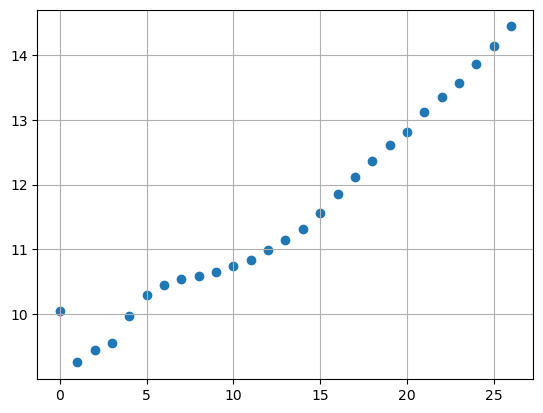

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

y = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])
m = 27
x = np.linspace(0 ,26 ,m)

plt.figure()
plt.scatter(x, y)
plt.grid()

In [4]:
import scipy.optimize as opt

def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

#Lineal = b0 + b1*x
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(data, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta, args = (X, y_vector))

#Cuadrática b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack((ones, x_factor, x2_factor))
sol2 = opt.minimize(funcion_de_costo, beta, args = (X2, y_vector))

#Cúbica b0 + b1*x + b2*x**2 + b3*x**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack((ones, x_factor, x2_factor, x3_factor))
sol3 = opt.minimize(funcion_de_costo, beta, args = (X3, y_vector))

In [5]:
sol1.x

array([9.11567634, 0.18667055])

In [6]:
sol2.x

array([9.59128648e+00, 7.25241227e-02, 4.39024738e-03])

In [7]:
sol3.x

array([9.56567851e+00, 8.52062968e-02, 3.15995553e-03, 3.13901573e-05])

In [8]:
def f1(x):
    return 9.11567634 + 0.18667055*x
def f2(x):
    return 9.59128648e+00 + 7.25241227e-02*x + 4.39024738e-03*x**2
def f3(x):
    return 9.56567851e+00 +  8.52062968e-02*x +3.15995553e-03*x**2 + 3.13901573e-05*x**3

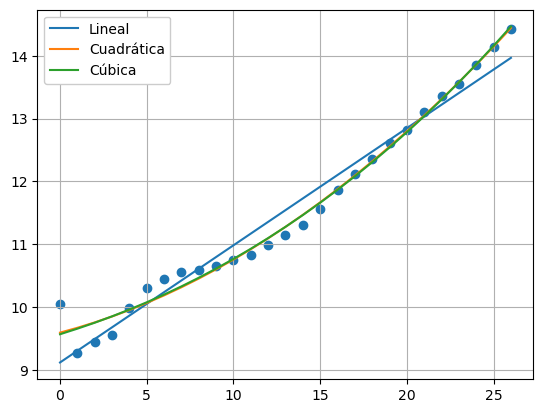

In [9]:
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(x, f1(x), label = "Lineal")
plt.plot(x, f2(x), label = "Cuadrática")
plt.plot(x, f3(x), label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

**1.**

In [15]:
import pandas as pd
data=pd.read_csv("population_data.csv")
y=np.array(data["Poblacion"])

In [16]:
start = min(data["Year"])
x = np.array(data["Year"]) - start

In [19]:
m = len(y)

beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])

# y = b0 + b1*x + b2*x**2
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )


# y = b0 + b1*x + b2*x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [21]:
import scipy.optimize as opt
import numpy as np

sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol2 = opt.minimize(funcion_de_costo, beta2, args=(X2, y_vector))
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))

In [22]:
sol1.x

array([24137.97372966,  1543.97435722])

In [23]:
sol2.x

array([2.44255332e+04, 1.51701656e+03, 4.14730780e-01])

In [24]:
sol3.x

array([ 2.84777582e+04,  7.39078928e+02,  3.05648801e+01, -3.09231944e-01])

In [25]:
def f1(x):
    return 24137.97372966 + 1543.97435722*x
def f2(x):
    return 2.44255332e+04 +  1.51701656e+03*x + 4.14730780e-01*x**2
def f3(x):
    return 2.84777582e+04 +  7.39078928e+02*x + 3.05648801e+01*x**2 - 3.09231944e-01*x**3

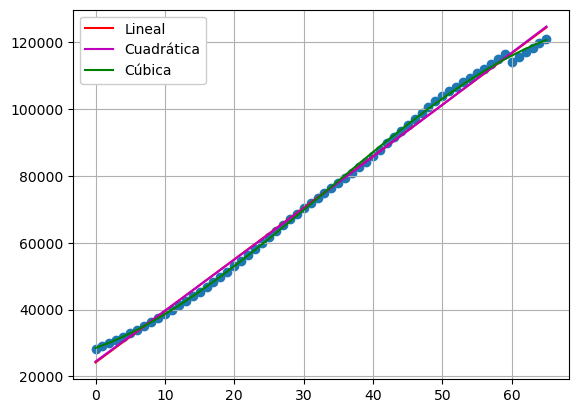

In [28]:
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(x, f1(x), "r", label = "Lineal")
plt.plot(x, f2(x), "m", label = "Cuadrática")
plt.plot(x, f3(x), "g", label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

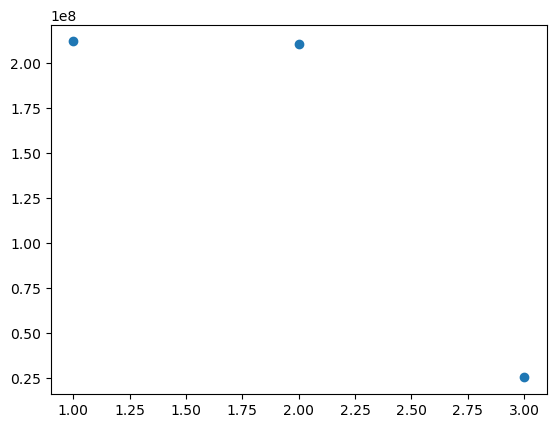

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

Error acumulado por polinomio.

**2.**

In [30]:
y = np.array(data["Nacimientos"])

In [31]:
start = min(data["Year"])
x = np.array(data["Year"]) - start

In [36]:
m = len(y)

beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])

# y = b0 + b1*x + b2*x**2
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )


# y = b0 + b1*x + b2*x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [37]:
import scipy.optimize as opt
import numpy as np

sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol2 = opt.minimize(funcion_de_costo, beta2, args=(X2, y_vector))
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))

In [38]:
sol1.x

array([1562659.09773415,   21983.88669269])

In [39]:
sol2.x

array([ 1.02112989e+06,  7.27770186e+04, -7.81553274e+02])

In [40]:
sol3.x

array([ 1.08851699e+06,  5.98496073e+04, -2.80658112e+02, -5.13671158e+00])

In [41]:
def f1(x):
    return 1562659.09773415 + 21983.88669269*x
def f2(x):
    return 1.02112989e+06 + 7.27770186e+04*x -7.81553274e+02*x**2
def f3(x):
    return 1.08851699e+06 +  5.98496073e+04*x - 2.80658112e+02*x**2 - 5.13671158e+00*x**3

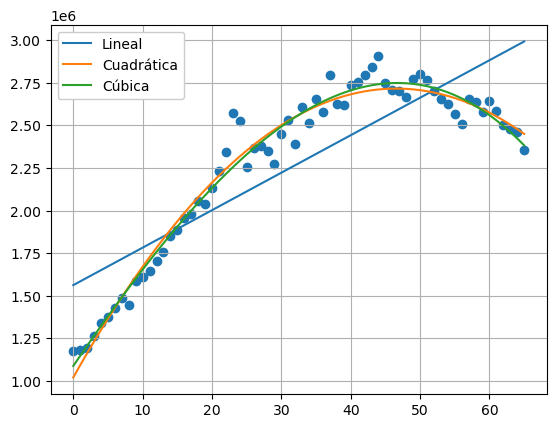

In [42]:
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(x, f1(x), label = "Lineal")
plt.plot(x, f2(x), label = "Cuadrática")
plt.plot(x, f3(x), label = "Cúbica")
plt.legend(framealpha=1, frameon=True)

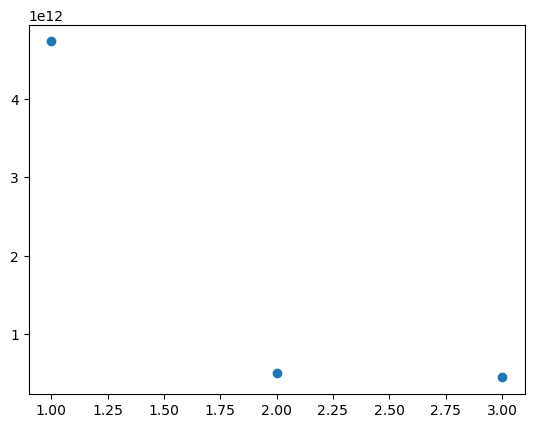

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

Error acumulado según polinomio.